<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [What are Light Curve Files?](01.04-Investigating-LC-Files.ipynb) | [Contents](index.ipynb) | [Fitting a Basic Transit Model](01.06-Fitting-A-Basic-Transit-Model.ipynb) >

# Limb Darkening 

<!--NAVIGATION-->
< [Folding a Light Curve](01.03-Folding-A-Lightcurve.ipynb) | [Contents](index.ipynb) | [Fitting a Basic Transit Model](01.05-Fitting-A-Basic-Transit-Model.ipynb) >

(0.36, 0.42)

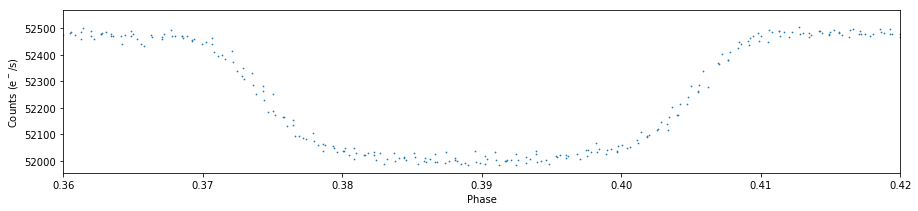

In [48]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
h = fits.open('data/kplr006922244-2010078095331_llc.fits')
h[1].data.names
t,flux,err=h[1].data['TIME'],h[1].data['PDCSAP_FLUX'],h[1].data['PDCSAP_FLUX_ERR']
t,flux,err=t[np.isfinite(flux)],flux[np.isfinite(flux)],err[np.isfinite(err)]


per=3.52233911024
phase = t/ per %1

plt.figure(figsize=(15,3))
plt.scatter(phase,flux,s=0.5)
plt.xlabel('Phase')
plt.ylabel('Counts (e$^-$/s)')
plt.xlim(0.36,0.42)

In the transit above the curved edges are due to limb darkening. The edges or limbs of the star are darker than the center, causing the transit depth to be shallower at *ingress* and *egress* (the slopes into and out of the transit.) You can read more about limb darkening and its effects [here](limbdarkening).

The effect of limb darkening is different depending on the star parameters and the bandpass that you observe in. We can use the package [*LDTK*](https://github.com/hpparvi/ldtk) to calculate the limb darkening parameters for our star.

Using the metadata in the header file (also discussed in previous notebooks) we can load in information about the host star. This information is based on the Kepler Input Catalog (KIC) and gives an approximation of the temperature, surface gravity and metallicity.

In [63]:
import astropy.units as u
from astropy.constants import G
teff = h[0].header['TEFF']
logg = h[0].header['LOGG']
feh = h[0].header['FEH']
r= h[0].header['RADIUS']*u.solRad


g=((10.**logg)*u.cm/(u.second**2))
m=((g*r**2/G).to(u.kg)).to(u.solMass)

print('Star Parameters')
print('----------------')
print('Mass: {:0.3}'.format(m))
print('Radius: {:0.3}'.format(r))
print('T_eff: {}'.format(teff*u.K))
print('logg: {:0.3}'.format(logg))
print('FeH: {:0.3}'.format(feh))

Star Parameters
----------------
Mass: 1.13 solMass
Radius: 1.45 solRad
T_eff: 6225.0 K
logg: 4.17
FeH: -0.04


Using *LDTK* we can calculate the limb darkening coefficients based on these stellar parameters. *ldtk* comes with the *Kepler* bandpass preloaded. 

*LDTK* will download stellar spectra from an online repository in a grid around our $T_{eff}$, $log(g)$ and FeH parameters. In this case we have chosen points that are within 50K, 0.1 dex in logg and 0.05 dex in FeH. This is $\approx$40 files and is around $500Mb$ of data. If you don't have the time to run this yourself the code finds the following limb darkening parameters:

$u=0.5230\pm0.0010\;\;$
$v=0.1218\pm0.0015$
 

In [64]:
from ldtk import LDPSetCreator, BoxcarFilter, TabulatedFilter
from ldtk.filters import kepler
from IPython.display import display, Latex
sc = LDPSetCreator(teff=(teff,50), logg=(logg,0.1), z=(feh,0.05), filters=[kepler])
ps = sc.create_profiles()

qc,qe = ps.coeffs_qd()
for i,(c,e) in enumerate(zip(qc,qe)):
    display(Latex('u$_{i:d} = {c[0]:5.4f} \pm {e[0]:5.4f}\quad$'
                  'v$_{i:d} = {c[1]:5.4f} \pm {e[1]:5.4f}$'.format(i=i+1,c=c,e=e)))


<IPython.core.display.Latex object>

In [65]:
qc,qe = ps.coeffs_nl()
qc

array([[-0.08913552,  0.90712858, -0.03923016, -0.14560566]])

<!--NAVIGATION-->
< [What are Light Curve Files?](01.04-Investigating-LC-Files.ipynb) | [Contents](index.ipynb) | [Fitting a Basic Transit Model](01.06-Fitting-A-Basic-Transit-Model.ipynb) >